In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Step 1: Load data and convert to PyTorch tensor
data = pd.read_excel('Thailand.xlsx')




In [2]:
data

,Entity,Year,Depressive,Anxiety,Bipolar,Eating,Schizophrenia,Attention,Conduct,Diopathic,Autism
0,Thailand,1990,1525578,1841362,183604,63024,158080,1329779,359240,1164077,182157
1,Thailand,1991,1568210,1882395,188268,65925,163893,1334272,355965,1128407,184087
2,Thailand,1992,1609541,1921084,192672,68419,169437,1337375,352714,1094180,185894
3,Thailand,1993,1648774,1956543,196736,70469,174600,1338446,349290,1061855,187504
4,Thailand,1994,1685824,1988930,200495,72586,179351,1337897,345634,1032571,188956
5,Thailand,1995,1722124,2019086,204051,74092,183706,1336838,341877,1007756,190344
6,Thailand,1996,1758093,2047693,207411,75518,187643,1335239,338016,986620,191620
7,Thailand,1997,1793742,2075123,210569,76377,191255,1332821,334112,967262,192726
8,Thailand,1998,1828824,2101575,213593,77149,194659,1330046,330345,949133,193698
9,Thailand,1999,1864103,2127061,216519,77846,197942,1327407,326922,931693,194571


In [3]:
columns = ['Year', 'Depressive', 'Anxiety', 'Bipolar', 'Eating', 'Schizophrenia', 'Attention', 'Conduct', 'Diopathic', 'Autism']
data = data[columns]

# Define the input and output columns
input_cols = ['Year']
output_cols = ['Depressive', 'Anxiety', 'Bipolar', 'Eating', 'Schizophrenia', 'Attention', 'Conduct', 'Diopathic', 'Autism']
# Split the data into training and testing sets
train_data = data[data['Year'] <= 2017]
test_data = data[ data['Year'] >= 2018]


Epoch [1/20000], Training Loss: 1.5096
Epoch [2/20000], Training Loss: 1.5266
Epoch [3/20000], Training Loss: 1.4711
Epoch [4/20000], Training Loss: 1.5144
Epoch [5/20000], Training Loss: 1.5108
Epoch [6/20000], Training Loss: 1.5359
Epoch [7/20000], Training Loss: 1.5216
Epoch [8/20000], Training Loss: 1.4726
Epoch [9/20000], Training Loss: 1.4248
Epoch [10/20000], Training Loss: 1.3979
Epoch [11/20000], Training Loss: 1.4420
Epoch [12/20000], Training Loss: 1.4268
Epoch [13/20000], Training Loss: 1.4407
Epoch [14/20000], Training Loss: 1.4067
Epoch [15/20000], Training Loss: 1.4182
Epoch [16/20000], Training Loss: 1.3571
Epoch [17/20000], Training Loss: 1.3890
Epoch [18/20000], Training Loss: 1.3920
Epoch [19/20000], Training Loss: 1.3128
Epoch [20/20000], Training Loss: 1.3227
Epoch [21/20000], Training Loss: 1.2962
Epoch [22/20000], Training Loss: 1.2855
Epoch [23/20000], Training Loss: 1.3535
Epoch [24/20000], Training Loss: 1.3110
Epoch [25/20000], Training Loss: 1.3085
Epoch [26

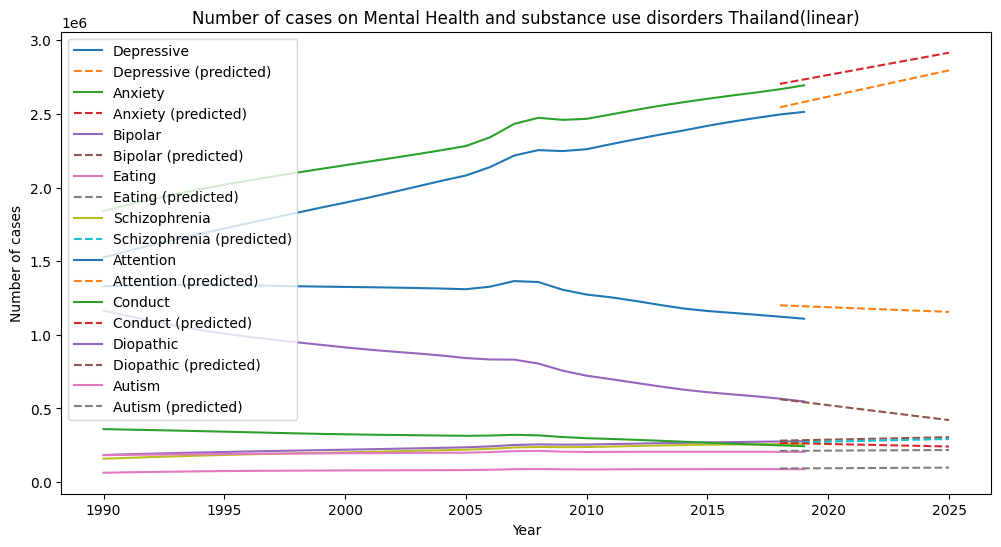

In [4]:
# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# Define the model
class LinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

# Define the hyperparameters
learning_rate = 0.01
num_epochs = 20000
batch_size = 16

# Initialize the model
model = LinearModel(len(input_cols), len(output_cols))

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Define the training loop
train_losses = []
for epoch in range(num_epochs):
    batch_losses = []
    # Shuffle the data
    train_data = train_data.sample(frac=1).reset_index(drop=True)
    # Split the data into batches
    for i in range(0, len(train_data), batch_size):
        batch_data = train_data[i:i+batch_size]
        # Extract the input and output data
        x_batch = torch.tensor(batch_data[input_cols].values, dtype=torch.float32)
        y_batch = torch.tensor(batch_data[output_cols].values, dtype=torch.float32)
        # Forward pass
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    train_loss = np.mean(batch_losses)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}')

# Prepare the input data
input_data = np.arange(2018, 2026).reshape(-1, 1)
input_data = (input_data - train_mean['Year']) / train_std['Year']
input_data = torch.tensor(input_data, dtype=torch.float32)

# Predict the output
with torch.no_grad():
    model.eval()
    output_data = model(input_data)
output_data = output_data.detach().numpy()

# Convert the output data back to original scale
output_data = (output_data * train_std[output_cols].values) + train_mean[output_cols].values

import matplotlib.pyplot as plt
import numpy as np

# Plot the predicted output
plt.figure(figsize=(12, 6))
for i, col in enumerate(output_cols):
    plt.plot(data['Year'].values, data[col].values, label=col)
    plt.plot(np.arange(2018, 2026), output_data[:, i], label=col + ' (predicted)', linestyle='--')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of cases')
plt.title('Number of cases on Mental Health and substance use disorders Thailand(linear)')
plt.show()

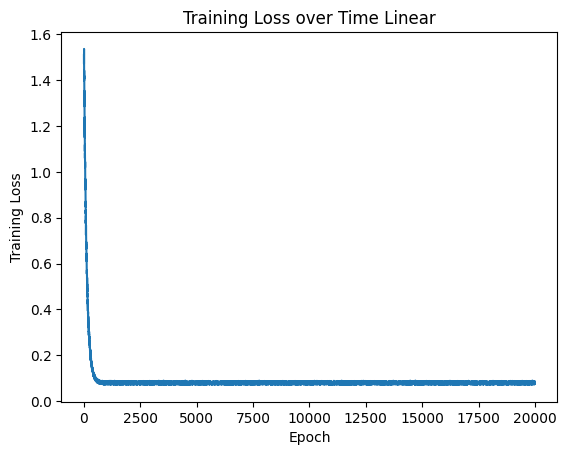

In [5]:
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Time Linear')
plt.show()

In [6]:
with torch.no_grad():
    model.eval()
    test_inputs = torch.tensor(test_data[input_cols].values, dtype=torch.float32)
    test_outputs = torch.tensor(test_data[output_cols].values, dtype=torch.float32)
    test_predictions = model(test_inputs)
    test_predictions = test_predictions.squeeze(1)  # remove the extra dimension
    test_loss = criterion(test_predictions, test_outputs)
print(f'Test Loss: {test_loss:.4f}')


Test Loss: 0.3707
